# Experiment 1: hyperparameter optimizing on single datasets

In [17]:
# Import external libraries
import pickle
import random

# Import internal metalearning libraries
from src.experimenting.hopt_experiment import HoptExperiment
from src.metalearning.metadata import MetaDataset
from src.metalearning.warmstarter import Warmstarter
from src.pipeline_optimization.bayesian_hopt import BayesianHopt
from src.utils.metafeature_utils import pca_rank_cor, size
from src.visualization.visualizers import visualize_search_performance

# Import thesis specific objective and search space
from src.utils.thesis_utils import thesis_lookup_objective, thesis_search_space

### Global parameters

In [18]:
max_evals = 50
duplicates = 5
n_init_configs = 5

### Fixed parts of the experiment

In [19]:
# Initialize metadataset and calculate metafeatures
metadataset_sample_names = !ls ../../data/metadata/interim
metasamples = [pickle.load(open('../../data/metadata/interim/' + sample_name,"rb")) for sample_name in metadataset_sample_names]
metadataset_all = MetaDataset(metasamples, metafeature_functions=[size, pca_rank_cor])

# Initialize thesis objective, search space and targets for leave-one-out procedure
objective = thesis_lookup_objective
search_space = thesis_search_space()
target_ids = ['EAST_diff_17520', 'EAST_box_17520', 'NORTHC_box_8760']


Calculate metafeatures of metasamples: 100%|██████████| 32/32 [00:01<00:00, 25.05it/s]


# Experiment definition

In [20]:
# initialize search strategies
rand = BayesianHopt(
    identifier='Random search',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    nr_random_starts=max_evals
)
naive = BayesianHopt(
    identifier='Naive',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    nr_random_starts=n_init_configs
)
warm = BayesianHopt(
    identifier='Warmstarted',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    warmstarter=Warmstarter(metadataset_all, n_init_configs=n_init_configs, n_sim_samples=5, n_best_per_sample=5)
)
cold = BayesianHopt(
    identifier='Coldstarted',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    warmstarter=Warmstarter(metadataset_all, n_init_configs=n_init_configs, n_sim_samples=5, n_best_per_sample=5, cold=True)
)

# initialize hyperoptimization experiment
hopt_exp = HoptExperiment(
    hopts=[naive, warm, cold, rand],
    duplicates=duplicates,
    objective=objective,
    metadataset=metadataset_all
)

### Run experiment

In [21]:
hopt_exp.run_hopt_experiment(target_ids)


Target time series: 100%|██████████| 3/3 [03:43<00:00, 74.37s/it]


### Visualize search performance on single datasets

In [42]:
from src.visualization.visualizers import visualize_search_performance

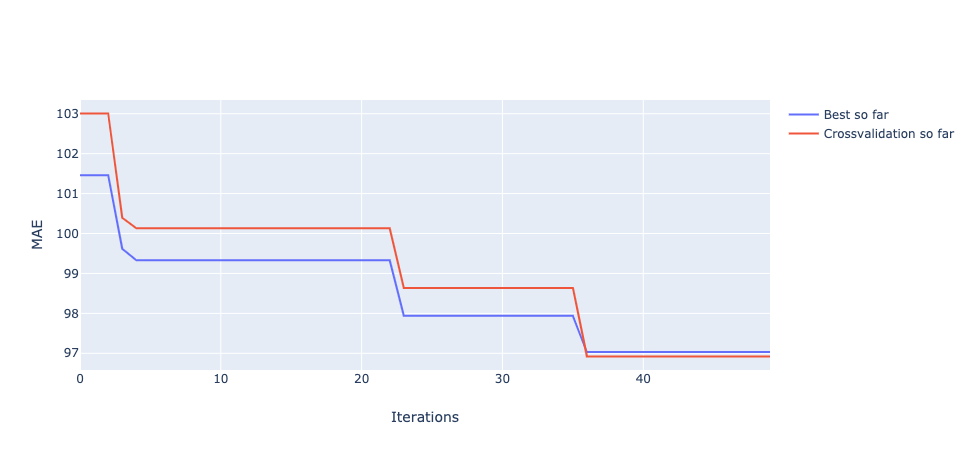

In [46]:
visualize_search_performance(hopt_exp._hopts[2],crossvalidation=True)

In [ ]:
visualize_walltime_comparison(hopt_exp,)

In [22]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [37]:
hopt_exp._hopts[0].results

results                                 configs                \
          loss status   walltime    crossval num_trees learning_rate   
0   105.852281     ok  18.738668  107.443923     660.0      0.068129   
1   102.457369     ok  26.379866  103.943138     520.0      0.040842   
2   103.780481     ok  20.022041  105.440611     380.0      0.005275   
3   103.863006     ok  18.589500  105.267396     380.0      0.316228   
4   106.355107     ok  15.844731  107.499553     520.0      0.040842   
5   110.624199     ok   7.054958  111.103903     100.0      0.005275   
6    98.125873     ok  45.484251   98.904690     800.0      0.316228   
7   100.188851     ok  35.481001  100.192825     800.0      0.316228   
8    97.463048     ok  38.262138   97.819714     800.0      0.113646   
9   105.793100     ok   8.584146  106.456069     240.0      0.014678   
10   98.764674     ok  57.633698   97.285296     660.0      0.113646   
11  102.679273     ok  23.969457  103.859541     660.0      0.113646   
12  116.177840     ok   0.843862  117.491959     100.0      0.014678   
13   96.352653     ok  57.325639   96.179273     800.0      0.014678   
14  106.643074     ok  12.254156  107.955176     240.0      0.014678   
15   97.694416     ok  46.802328   96.497492     660.0      0.008799   
16  102.319501     ok  27.169545  104.061779     520.0      0.003162   
17   97.463048     ok  38.262138   97.819714     800.0      0.113646   
18   96.352653     ok  57.325639   96.179273     800.0      0.024484   
19   96.352653     ok  57.325639   96.179273     800.0      0.024484   
20   96.471925     ok  47.092549   96.310682     660.0      0.024484   
21   96.261827     ok  49.111165   96.098132     800.0      0.008799   
22  100.265046     ok  35.009976  101.581142     660.0      0.005275   
23   98.919214     ok  29.774843   99.738936     520.0      0.008799   
24   98.311473     ok  56.178252   96.762090     800.0      0.003162   
25  102.679273     ok  23.969457  103.859541     660.0      0.024484   
26   98.742154     ok  32.417629   99.086185     380.0      0.008799   
27   99.332493     ok  35.532666  100.129860     800.0      0.008799   
28  100.056647     ok  34.962858  101.262048     660.0      0.068129   
29  108.014600     ok  10.466990  109.575891     240.0      0.068129   
30   97.032129     ok  36.935046   96.919727     520.0      0.040842   
31  105.399639     ok  22.812560  107.001410     800.0      0.024484   
32  100.105594     ok  39.074987  101.476063     660.0      0.040842   
33   98.509006     ok  24.410152   98.751247     380.0      0.005275   
34  102.388558     ok  27.698243  103.920236     520.0      0.003162   
35  100.890711     ok  28.963376  101.692857     800.0      0.005275   
36  101.555382     ok  22.845729  102.888209     520.0      0.040842   
37   98.137866     ok  51.272374   98.931357     660.0      0.068129   
38   96.261827     ok  49.111165   96.098132     800.0      0.014678   
39  111.159170     ok   5.817868  112.303587     240.0      0.014678   
40   98.509006     ok  24.410152   98.751247     380.0      0.005275   
41  117.713364     ok   0.806550  118.928505     100.0      0.189574   
42  103.699625     ok  27.370254  105.535214     800.0      0.008799   
43   99.622288     ok  18.414203  100.151768     380.0      0.014678   
44  100.265046     ok  35.009976  101.581142     660.0      0.008799   
45  100.188851     ok  35.481001  100.192825     800.0      0.003162   
46  100.686833     ok  25.047641  101.296994     660.0      0.014678   
47  102.443899     ok  24.869373  104.114300     520.0      0.005275   
48   99.720287     ok  47.586804  101.187488     800.0      0.040842   
49  106.205796     ok  19.171135  106.877328     660.0      0.189574   

                                         
   max_depth min_child_weight subsample  
0        7.0             40.0      0.50  
1       16.0             22.5      0.50  
2       18.0             40.0      0.75  
3       14.0             22.5      0.50  
4        7

In [39]:
import pandas as pd
rolling_min = pd.Series(
    [hopt_exp._hopts[0].results.loc[:i, ("results", "loss")].min() for i in range(len(hopt_exp._hopts[0].results))]
)

In [40]:
rolling_min

0     105.852281
1     102.457369
2     102.457369
3     102.457369
4     102.457369
5     102.457369
6      98.125873
7      98.125873
8      97.463048
9      97.463048
10     97.463048
11     97.463048
12     97.463048
13     96.352653
14     96.352653
15     96.352653
16     96.352653
17     96.352653
18     96.352653
19     96.352653
20     96.352653
21     96.261827
22     96.261827
23     96.261827
24     96.261827
25     96.261827
26     96.261827
27     96.261827
28     96.261827
29     96.261827
30     96.261827
31     96.261827
32     96.261827
33     96.261827
34     96.261827
35     96.261827
36     96.261827
37     96.261827
38     96.261827
39     96.261827
40     96.261827
41     96.261827
42     96.261827
43     96.261827
44     96.261827
45     96.261827
46     96.261827
47     96.261827
48     96.261827
49     96.261827
dtype: float64

In [ ]:
fig.add_trace(go.Scatter(x=idx, y=rolling_min, mode="lines", name="Best so far"))

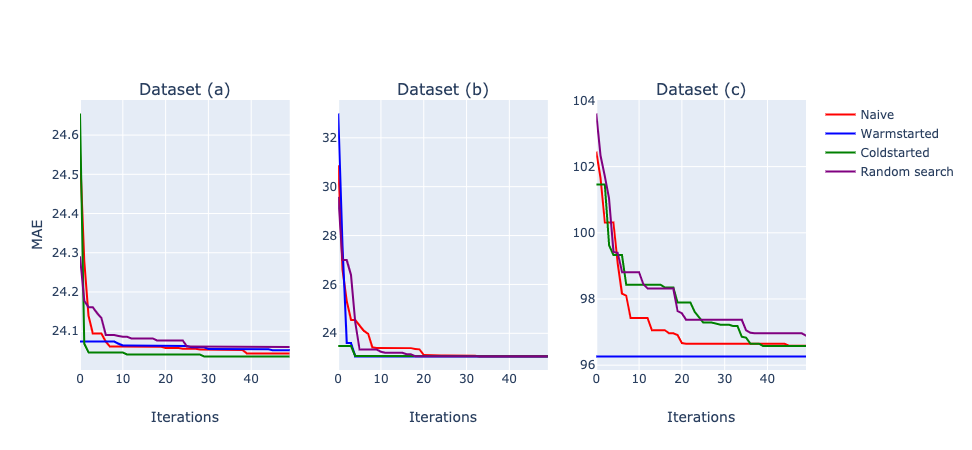

In [23]:
colors = ['red','blue','green','purple']
legend = [True, False, False]

fig = make_subplots(
    rows=1,
    cols=3,
    subplot_titles=('Dataset (a)', 'Dataset (b)', 'Dataset (c)')
)

for i, sample_id in enumerate(target_ids):
        # transform to best so far dataframe
        data = hopt_exp.best_so_far[sample_id].mean(level='iterations')

        for j, identifier in enumerate([hopt.identifier for hopt in hopt_exp._hopts]):
            fig.add_trace(go.Scatter(
                y = data[identifier],
                name = identifier,
                line = {'color': colors[j]},
                showlegend = legend[i]
            ),row=1, col=i+1)
        fig.update_xaxes(title_text='Iterations', row=1, col=i+1)
        
        fig.update_layout(
            width=1000,
            yaxis=go.layout.YAxis(title='MAE')
        )

fig.show()

# Old stuff

### Visualizers

In [ ]:
hopt_exp.visualize_avg_ranks()

### Visualize search performance on single datasets

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
colors = ['red','blue','green','black']
legend = [True, False, False]

fig = make_subplots(
    rows=1,
    cols=3,
    subplot_titles=('Dataset (a)', 'Dataset (b)', 'Dataset (c)')
)

for i, sample_id in enumerate(target_ids):
        # transform to best so far dataframe
        data = hopt_exp.best_so_far[sample_id].mean(level='iterations')

        for j, identifier in enumerate([hopt.identifier for hopt in hopt_exp._hopts]):
            fig.add_trace(go.Scatter(
                y = data[identifier],
                name = identifier,
                line = {'color': colors[j]},
                showlegend = legend[i]
            ),row=1, col=i+1)
        fig.update_xaxes(title_text='Iterations', row=1, col=i+1)
        
        fig.update_layout(
            width=1000,
            yaxis=go.layout.YAxis(title='MAE')
        )

fig.show()

### Visualize perfromance heatmap of single dataset

In [ ]:
import pandas as pd
intermediate = hopt_exp.results.stack(0)
intermediate.columns = pd.Index(['Coldstarted', 'Bayesian', 'Random search','Warmstarted'], name='hopt')
hopt_exp.results = intermediate.stack().unstack(2).unstack(2)

In [ ]:
sample_id = target_ids[2]

hopt_ids = [hopt.identifier for hopt in hopt_exp._hopts]
result = hopt_exp.results[sample_id]

fig = make_subplots(rows=1, cols=len(hopt_ids), subplot_titles=hopt_ids)

for j, hopt_id in enumerate(hopt_ids):
    data = result[hopt_id]
    x = list(data.index.levels[1]) * hopt_exp._duplicates
    y = data.values
    fig.add_trace(go.Histogram2dContour(x=x, y=y, name=hopt_id, showlegend=False), row=1, col=j + 1)

fig.update_yaxes(title_text="Mean squared error")
fig.update_xaxes(title_text="Iterations")

fig.show()